In [3]:
# Importation des librairies
import zipfile
import gzip
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

In [4]:
gzip_path = r'H:\DATA\Datafiles\Projets\CPAM_Data\NTOT2024_12.CSV.gz'

# Importation des données et du fichier descriptif des variables
data = pd.read_csv(gzip_path, sep=';', compression='gzip', encoding='ISO-8859-1')

C:\Users\saeru\AppData\Local\Temp\ipykernel_15376\4165348403.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(gzip_path, sep=';', compression='gzip', encoding='ISO-8859-1')


In [ ]:
data

,PRS_FAC_TOP,l_fac_top,l_serie,SERIE,prs_nat,l_prs_nat,rem_date,sns_date,asu_nat,l_asu_nat,...,l_exe_spe,exe_spe1,l_exe_spe1,exe_stj1,l_exe_stj1,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1045,EXAM PARENTAL GROSSESSE CO-PARENT,202412,202411,3,Maternité,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"26,50","26,50","0,00",1.0,"1,00"
1,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1045,EXAM PARENTAL GROSSESSE CO-PARENT,202412,202412,3,Maternité,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"26,50","26,50","0,00",1.0,"1,00"
2,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202409,202408,1,Maladie,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"120,00","120,00","0,00",2.0,"2,00"
3,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202409,202409,1,Maladie,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"1.812,00","1.812,00","0,00",30.0,"30,00"
4,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202410,202409,1,Maladie,...,01-Médecine générale,11,Médecins Omnipraticiens,1,Libéral,"60,00","60,00","0,00",1.0,"1,00"


In [6]:
data.columns

Index(['PRS_FAC_TOP', 'l_fac_top', 'l_serie', 'SERIE', 'prs_nat', 'l_prs_nat',
       'rem_date', 'sns_date', 'asu_nat', 'l_asu_nat', 'cpl_cod', 'l_cpl_cod',
       'REM_TAU', 'pre_spe', 'l_pre_spe', 'pre_spe1', 'l_pre_spe1', 'pre_stj1',
       'l_pre_stj1', 'exe_spe', 'l_exe_spe', 'exe_spe1', 'l_exe_spe1',
       'exe_stj1', 'l_exe_stj1', 'rem_mon', 'rec_mon', 'dep_mon', 'act_dnb',
       'act_coe'],
      dtype='object')

In [7]:
data['sns_date'] = data['sns_date'].astype(str)
data['rem_date'] = data['rem_date'].astype(str)
data['sns_year'] = data['sns_date'].str[:4]
data['sns_month'] = data['sns_date'].str[4:6]
data['rem_year'] = data['rem_date'].str[:4]
data['rem_month'] = data['rem_date'].str[4:6]

In [8]:
data.head()

,PRS_FAC_TOP,l_fac_top,l_serie,SERIE,prs_nat,l_prs_nat,rem_date,sns_date,asu_nat,l_asu_nat,...,l_exe_stj1,rem_mon,rec_mon,dep_mon,act_dnb,act_coe,sns_year,sns_month,rem_year,rem_month
0,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1045,EXAM PARENTAL GROSSESSE CO-PARENT,202412,202411,3,Maternité,...,Libéral,"26,50","26,50","0,00",1.0,"1,00",2024,11,2024,12
1,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1045,EXAM PARENTAL GROSSESSE CO-PARENT,202412,202412,3,Maternité,...,Libéral,"26,50","26,50","0,00",1.0,"1,00",2024,12,2024,12
2,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202409,202408,1,Maladie,...,Libéral,"120,00","120,00","0,00",2.0,"2,00",2024,08,2024,09
3,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202409,202409,1,Maladie,...,Libéral,"1.812,00","1.812,00","0,00",30.0,"30,00",2024,09,2024,09
4,0,0-Régime Général stricto-sensu,C Omnipraticiens,111111,1048,CONSULTATION INIT MT ALD,202410,202409,1,Maladie,...,Libéral,"60,00","60,00","0,00",1.0,"1,00",2024,09,2024,10


In [9]:
data['rem_mon'] = data['rem_mon'].str.replace('.', '')
data['rem_mon'] = data['rem_mon'].str.replace(' ', '')
data['rem_mon'] = data['rem_mon'].str.replace(',', '.')
data['rem_mon'] = data['rem_mon'].astype(float)

In [10]:
time_data = pd.DataFrame()
time_data = data[['sns_year', 'rem_year', 'rem_month', 'l_prs_nat', 'rem_mon', 'l_exe_spe', 'l_exe_spe1']]

In [11]:
time_data.head()

,sns_year,rem_year,rem_month,l_prs_nat,rem_mon,l_exe_spe,l_exe_spe1
0,2024,2024,12,EXAM PARENTAL GROSSESSE CO-PARENT,26.5,01-Médecine générale,Médecins Omnipraticiens
1,2024,2024,12,EXAM PARENTAL GROSSESSE CO-PARENT,26.5,01-Médecine générale,Médecins Omnipraticiens
2,2024,2024,09,CONSULTATION INIT MT ALD,120.0,01-Médecine générale,Médecins Omnipraticiens
3,2024,2024,09,CONSULTATION INIT MT ALD,1812.0,01-Médecine générale,Médecins Omnipraticiens
4,2024,2024,10,CONSULTATION INIT MT ALD,60.0,01-Médecine générale,Médecins Omnipraticiens


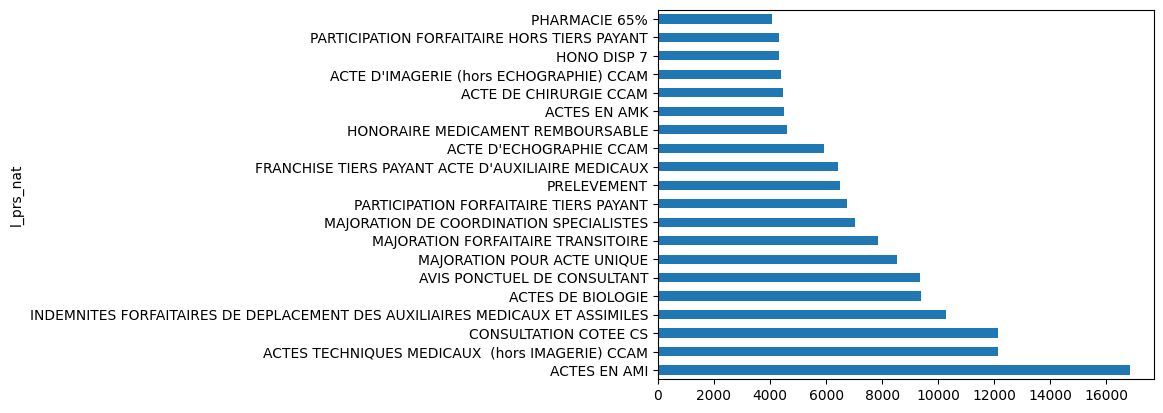

In [12]:
# plot prs_nat
time_data['l_prs_nat'].value_counts().head(20).plot(kind='barh')
plt.show()

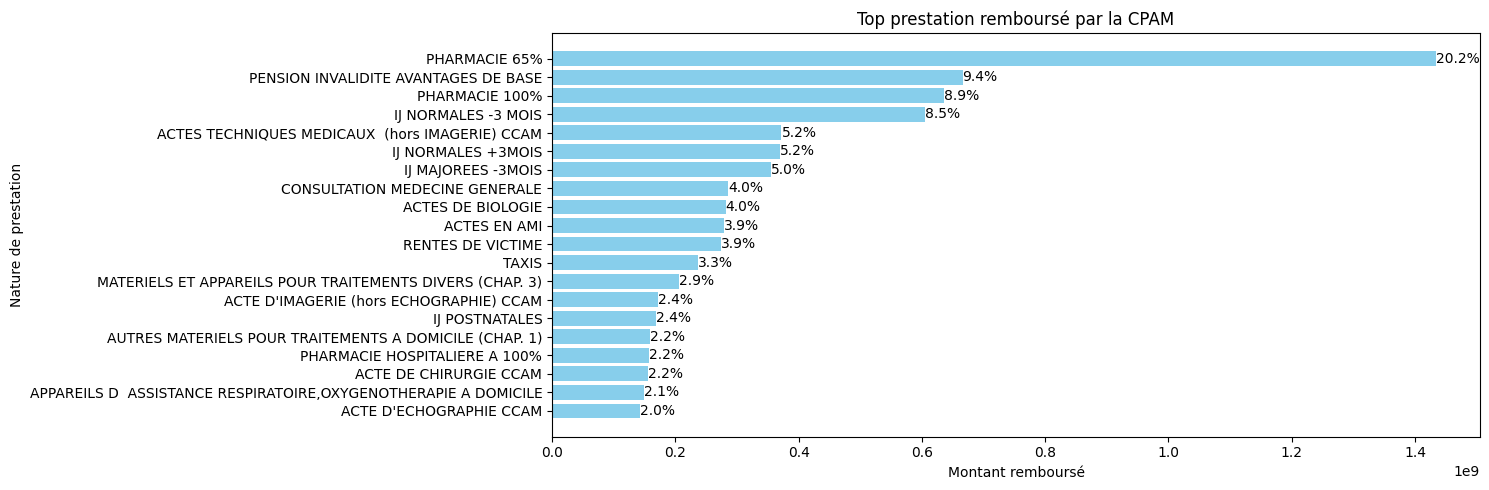

In [13]:
grouped_data = time_data.groupby('l_prs_nat')['rem_mon'].sum().reset_index()
top_prs_rem = grouped_data.sort_values(by='rem_mon', ascending=False).head(20)
top_prs_rem['Percentage'] = (top_prs_rem['rem_mon'] / top_prs_rem['rem_mon'].sum()) * 100

# Diagramme en barres horizontal
plt.figure(figsize=(15, 5)) 
plt.barh(top_prs_rem['l_prs_nat'], top_prs_rem['rem_mon'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_prs_rem['rem_mon']):
    percentage = f"{top_prs_rem['Percentage'].iloc[index]:.1f}%" 
    plt.text(value, index, percentage, va='center')


plt.xlabel('Montant remboursé')
plt.ylabel('Nature de prestation')
plt.title('Top prestation remboursé par la CPAM')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

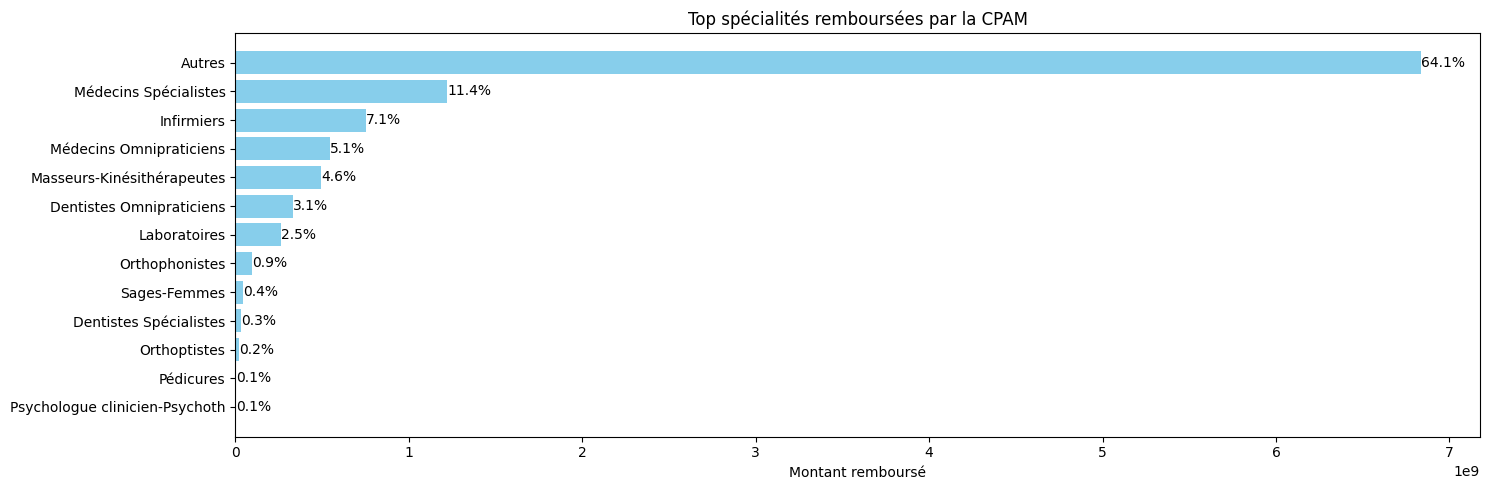

In [14]:
spe1_data = time_data.groupby('l_exe_spe1')['rem_mon'].sum().reset_index()
top_spe1_rem = spe1_data.sort_values(by='rem_mon', ascending=False)
top_spe1_rem['Percentage'] = (top_spe1_rem['rem_mon'] / top_spe1_rem['rem_mon'].sum()) * 100

# Diagramme en barres horizontal
plt.figure(figsize=(15, 5)) 
plt.barh(top_spe1_rem['l_exe_spe1'], top_spe1_rem['rem_mon'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_spe1_rem['rem_mon']):
    percentage = f"{top_spe1_rem['Percentage'].iloc[index]:.1f}%" 
    plt.text(value, index, percentage, va='center')


plt.xlabel('Montant remboursé')
plt.ylabel('')
plt.title('Top spécialités remboursées par la CPAM')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

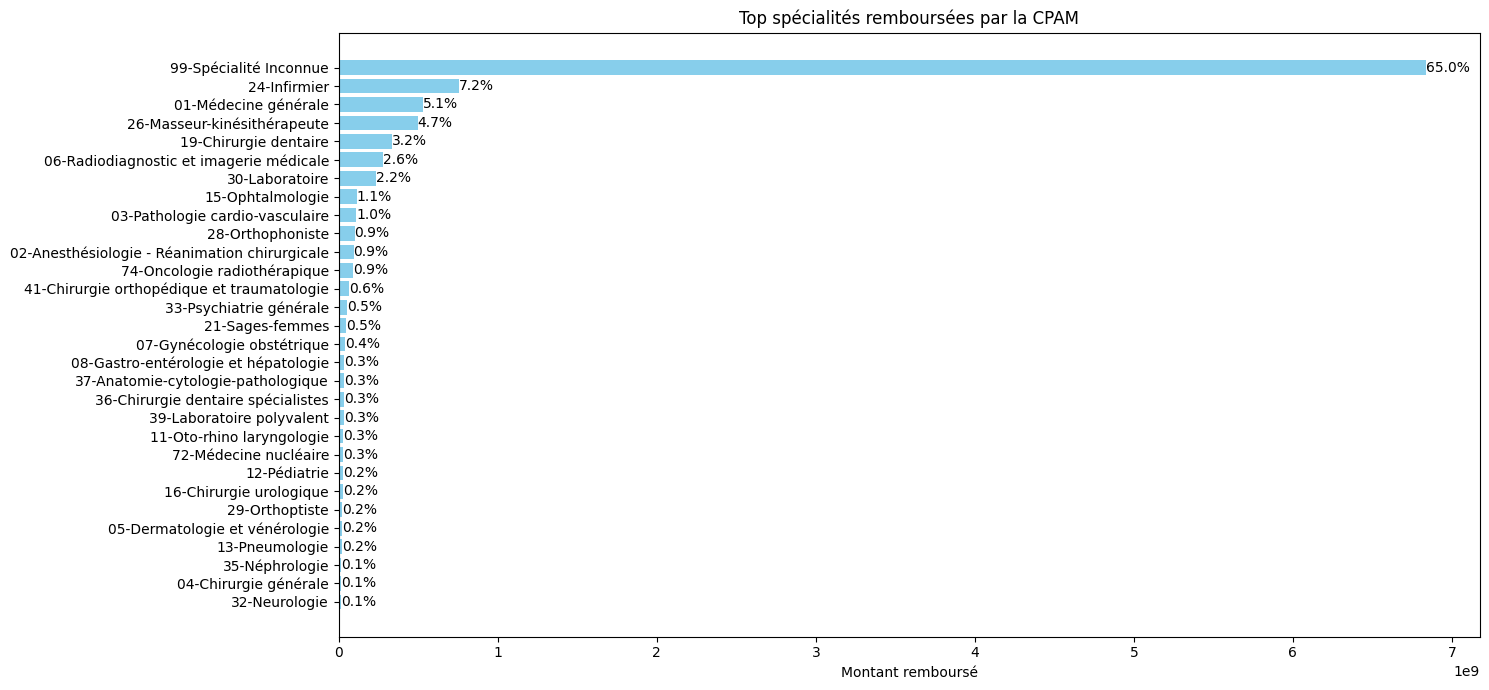

In [15]:
spe_data = time_data.groupby('l_exe_spe')['rem_mon'].sum().reset_index()
top_spe_rem = spe_data.sort_values(by='rem_mon', ascending=False).head(30)
top_spe_rem['Percentage'] = (top_spe_rem['rem_mon'] / top_spe_rem['rem_mon'].sum()) * 100

# Diagramme en barres horizontal
plt.figure(figsize=(15, 7)) 
plt.barh(top_spe_rem['l_exe_spe'], top_spe_rem['rem_mon'], color='skyblue')

# Pourcentages sur les barres
for index, value in enumerate(top_spe_rem['rem_mon']):
    percentage = f"{top_spe_rem['Percentage'].iloc[index]:.1f}%" 
    plt.text(value, index, percentage, va='center')


plt.xlabel('Montant remboursé')
plt.ylabel('')
plt.title('Top spécialités remboursées par la CPAM')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

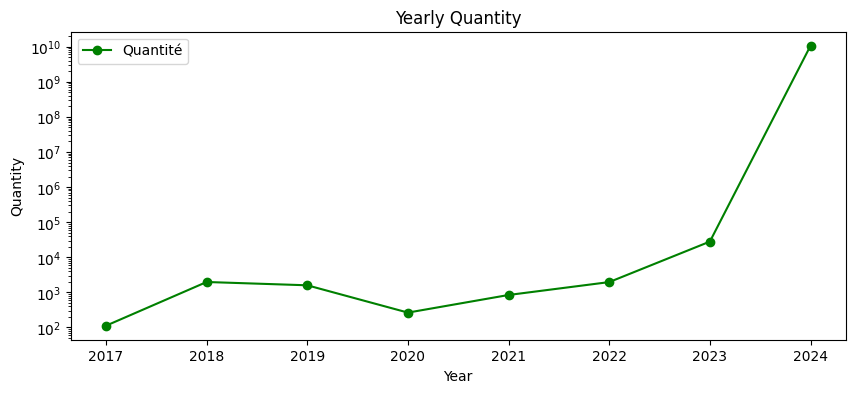

In [16]:
# plot sns_year and rem_mon on the same plot
agg_year_data = time_data.groupby('rem_year')['rem_mon'].sum().reset_index()


plt.figure(figsize=(10, 4))
plt.plot(agg_year_data['rem_year'], agg_year_data['rem_mon'], color='green', marker='o', label='Quantité')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Yearly Quantity')
plt.legend()
plt.grid(False)
plt.show()

In [17]:
agg_year_data['rem_year'].unique()

array(['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype=object)

In [18]:
agg_year_data

,rem_year,rem_mon
0,2017,1.121700e+02
1,2018,1.975680e+03
2,2019,1.591470e+03
3,2020,2.652200e+02
4,2021,8.430300e+02
5,2022,1.964710e+03
6,2023,2.799901e+04
7,2024,1.066854e+10


In [19]:
agg_month_data = time_data.groupby('rem_month')['rem_mon'].sum().reset_index()
agg24_data = year24_data.groupby('rem_month')['rem_mon'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(agg_month_data['rem_month'], agg_month_data['rem_mon'], color='green', marker='o', label='Montant remboursé')
plt.plot(agg24_data['rem_month'], agg24_data['rem_mon'], color='red', marker='o', label='Montant remboursé en 2024')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Yearly Quantity')
plt.legend()
plt.grid(False)
plt.show()

NameError: name 'year24_data' is not defined

In [ ]:
year24_data = time_data[time_data['rem_year'] == '2024']

In [ ]:
year24_data['rem_year'].unique()

array(['2024'], dtype=object)

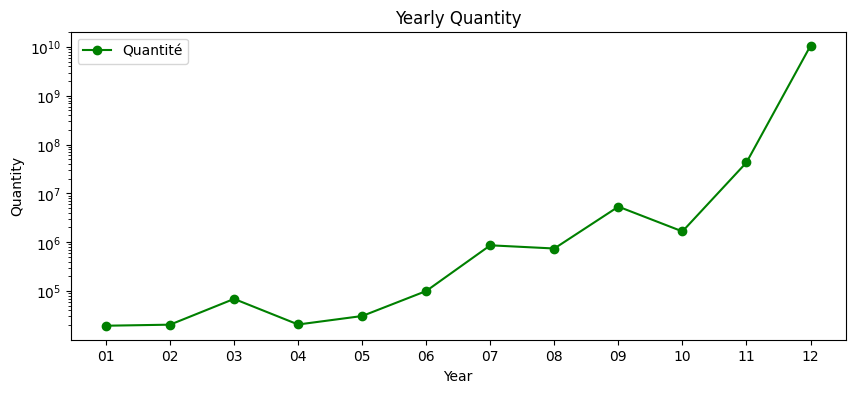

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(agg24_data['rem_month'], agg24_data['rem_mon'], color='green', marker='o', label='Quantité')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Yearly Quantity')
plt.legend()
plt.grid(False)
plt.show()